# AirBNB Advanced Analytics & ML Project (Phase 1)
#### Project Vision
This notebook represents the **Phase 1** of a comprehensive Data Science initiative aimed at demystifying the Airbnb market in Athens Greece. The ultimate goal is to build an automated **"Value for Money" estimator** deployed as a web application.
##### This specific module focuses on Regression: **Precision Price Prediction.**

### Data Source
##### **Inside Airbnb** website (Athens Dataset - September 2025) (https://data.insideairbnb.com/greece/attica/athens/2025-09-26/data/listings.csv.gz)
##### Alternative link (https://drive.google.com/file/d/1nuhqm3dId7OrzsOO2QuK7L7bCpqav1He/view?usp=sharing)

In [1]:
import pandas as pd
import numpy  as np


air_data = pd.read_csv("airbnb_raw_data.csv")
air_data.info()
air_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584 entries, 0 to 15583
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15584 non-null  int64  
 1   listing_url                                   15584 non-null  object 
 2   scrape_id                                     15584 non-null  int64  
 3   last_scraped                                  15584 non-null  object 
 4   source                                        15584 non-null  object 
 5   name                                          15584 non-null  object 
 6   description                                   15247 non-null  object 
 7   neighborhood_overview                         7509 non-null   object 
 8   picture_url                                   15584 non-null  object 
 9   host_id                                       15584 non-null 

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.558400e+04,1.558400e+04,1.558400e+04,15572.000000,15572.000000,0.0,15584.000000,15584.000000,15584.000000,14527.000000,...,13241.000000,13241.000000,13241.000000,13241.000000,13241.000000,15584.000000,15584.000000,15584.000000,15584.000000,13241.000000
mean,7.701253e+17,2.025093e+13,2.851131e+08,34.963524,46.137490,NaN,37.979571,23.731338,3.720033,1.202588,...,4.777037,4.859688,4.861588,4.692962,4.728751,18.083291,17.002310,0.996856,0.030416,1.736433
std,5.584347e+17,3.906375e-03,2.199127e+08,94.681896,163.919035,NaN,0.012920,0.012274,1.944944,0.541814,...,0.385488,0.301281,0.328573,0.425825,0.392592,30.714957,30.425216,4.231439,0.526131,1.758363
min,2.726200e+04,2.025093e+13,3.717700e+04,1.000000,1.000000,NaN,37.949625,23.700809,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,4.745777e+07,2.025093e+13,7.979395e+07,2.000000,2.000000,NaN,37.968825,23.724020,2.000000,1.000000,...,4.730000,4.850000,4.860000,4.590000,4.670000,1.000000,1.000000,0.000000,0.000000,0.400000
50%,9.419307e+17,2.025093e+13,2.295268e+08,7.000000,8.000000,NaN,37.978369,23.729620,4.000000,1.000000,...,4.890000,4.940000,4.960000,4.820000,4.830000,5.000000,4.000000,0.000000,0.000000,1.100000
75%,1.253467e+18,2.025093e+13,4.882134e+08,28.000000,33.000000,NaN,37.986958,23.736811,4.000000,1.000000,...,5.000000,5.000000,5.000000,4.960000,4.930000,19.000000,18.000000,0.000000,0.000000,2.560000
max,1.517622e+18,2.025093e+13,7.196119e+08,1457.000000,8774.000000,NaN,38.030830,23.780220,16.000000,12.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,165.000000,165.000000,40.000000,13.000000,13.110000


### Data set Preprocessing and Feature Engineering

##### Data Type Casting and Cleaning
The `price` and host response metrics contain non-numeric characters (4, %, ,). These are removed to convert the features into 'float' format for analysis.

In [2]:
# Remove "$" and ","
air_data["price"]                = air_data["price"].str.replace("$","").str.replace(",","")

# Convert "object" to "float"
air_data["price"]                = air_data["price"].astype(float)

# We do the same thing in one line
air_data["host_response_rate"]   = air_data["host_response_rate"].str.replace("%", "").astype(float)
air_data["host_acceptance_rate"] = air_data["host_acceptance_rate"].str.replace("%", "").astype(float)

Calculation of the distance of each AirBNB from Syntagma, using the `latitude` and `longitude` columns

In [3]:
latitude_dif_syn       = air_data["latitude"]  - 37.9755               
longitude_dif_syn      = air_data["longitude"] - 23.7349
mean_distance_syn      = np.deg2rad(air_data["latitude"] + 37.9755) / 2

dist_lat_syntagma      = latitude_dif_syn  * (np.pi / 180) * 6371
dist_long_syntagma     = np.deg2rad(longitude_dif_syn) * 6371 * np.cos(mean_distance_syn)

distance_from_syntagma = np.sqrt(np.power(dist_lat_syntagma, 2) + np.power(dist_long_syntagma, 2))

print(distance_from_syntagma.describe())

air_data["distance_from_syntagma"] = distance_from_syntagma

count    15584.000000
mean         1.635702
std          0.920888
min          0.028757
25%          0.990613
50%          1.486632
75%          2.096686
max          6.200870
dtype: float64


##### Raw dates (e.g., `host_since`, `last_review`) cannot be directly interpreted by regression algorithms. To extract value from these temporal markers, I converted them into numerical **duration features** (measured in days relative to the dataset's latest scrape date).

This transformation creates three powerful proxy metrics:
1.  **`days_been_active` (Host Experience):** Indicates how long the host has been on the platform. Experienced hosts may price differently.
2.  **`days_from_last_review` (Recency):** A crucial metric for listing activity. A small number implies an active, currently bookable property.
3.  **`days_from_first_review` (Longevity):** Indicates the lifespan of the listing itself (distinct from the host's account age).

In [4]:
date_of_last_scraped   = pd.to_datetime(air_data["last_scraped"])
date_of_first_host     = pd.to_datetime(air_data["host_since"])
date_of_last_review    = pd.to_datetime(air_data["first_review"])
date_of_first_review   = pd.to_datetime(air_data["last_review"])

# Calculation of reference date.
reference_date         = date_of_last_scraped.max()

# Calculation of total days for each of the three categories
days_been_active       = (reference_date - date_of_first_host).dt.days
days_from_last_review  = (reference_date - date_of_first_review).dt.days
days_from_first_review = (reference_date - date_of_last_review).dt.days

print(days_been_active.describe())
print(days_from_last_review.describe())
print(days_from_first_review.describe())

count    15572.000000
mean      2313.718084
std       1357.928056
min          9.000000
25%       1044.000000
50%       2486.000000
75%       3382.000000
max       5863.000000
Name: host_since, dtype: float64
count    13241.000000
mean       171.373386
std        365.306081
min          1.000000
25%         12.000000
50%         27.000000
75%        138.000000
max       4111.000000
Name: last_review, dtype: float64
count    13241.000000
mean      1138.111094
std        995.794221
min          1.000000
25%        378.000000
50%        810.000000
75%       1667.000000
max       5443.000000
Name: first_review, dtype: float64


##### I add this additional information into the data set

In [5]:
air_data["days_been_active"]       = days_been_active
air_data["days_from_last_review"]  = days_from_last_review
air_data["days_from_first_review"] = days_from_first_review

### The initial raw data will be approached in two ways:
* In the first, the data will be selected **manually**, based on human logic.
* In the second, the data will be filtered appropriately so that as little information as possible is lost.

#### Manually selecting data

In [6]:
air_data_cl = air_data[["host_response_time",
                        "host_response_rate",
                        "host_is_superhost",
                        "room_type",
                        "accommodates",
                        "bathrooms",
                        "bedrooms",
                        "price",
                        "review_scores_rating",
                        "reviews_per_month",
                        "distance_from_syntagma",
                        "days_been_active",
                        "days_from_last_review",
                        "days_from_first_review"]].copy()

rows_, columns_ = air_data_cl.shape
print(f"Our new data frame has {rows_} and {columns_} columns")
print(air_data_cl.info())
air_data_cl.describe()

Our new data frame has 15584 and 14 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584 entries, 0 to 15583
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_response_time      13812 non-null  object 
 1   host_response_rate      13812 non-null  float64
 2   host_is_superhost       14656 non-null  object 
 3   room_type               15584 non-null  object 
 4   accommodates            15584 non-null  int64  
 5   bathrooms               14527 non-null  float64
 6   bedrooms                15482 non-null  float64
 7   price                   14524 non-null  float64
 8   review_scores_rating    13241 non-null  float64
 9   reviews_per_month       13241 non-null  float64
 10  distance_from_syntagma  15584 non-null  float64
 11  days_been_active        15572 non-null  float64
 12  days_from_last_review   13241 non-null  float64
 13  days_from_first_review  13241 non-null  float64

,host_response_rate,accommodates,bathrooms,bedrooms,price,review_scores_rating,reviews_per_month,distance_from_syntagma,days_been_active,days_from_last_review,days_from_first_review
count,13812.000000,15584.000000,14527.000000,15482.000000,14524.000000,13241.000000,13241.000000,15584.000000,15572.000000,13241.000000,13241.000000
mean,97.288662,3.720033,1.202588,1.399302,122.899821,4.763186,1.736433,1.635702,2313.718084,171.373386,1138.111094
std,11.706497,1.944944,0.541814,0.855850,452.296317,0.386801,1.758363,0.920888,1357.928056,365.306081,995.794221
min,0.000000,1.000000,0.000000,0.000000,9.000000,1.000000,0.010000,0.028757,9.000000,1.000000,1.000000
25%,100.000000,2.000000,1.000000,1.000000,54.000000,4.710000,0.400000,0.990613,1044.000000,12.000000,378.000000
50%,100.000000,4.000000,1.000000,1.000000,78.000000,4.870000,1.100000,1.486632,2486.000000,27.000000,810.000000
75%,100.000000,4.000000,1.000000,2.000000,119.000000,4.980000,2.560000,2.096686,3382.000000,138.000000,1667.000000
max,100.000000,16.000000,12.000000,14.000000,38000.000000,5.000000,13.110000,6.200870,5863.000000,4111.000000,5443.000000


##### Statistical Analysis

The statistical summary reveals a **high standard deviation** in the `price` column, suggesting significant variablitily and the presence of extreme outliers.
To fully understand the nature of the target variable before modeling, I will employ visual inspaction techniques:
* **Boxplot:** To detect specific outliers and visualize the Interquartile Range (IQR).
* **Histogram:** To examine the distribution shape (skewness) and frequence of price ranges.

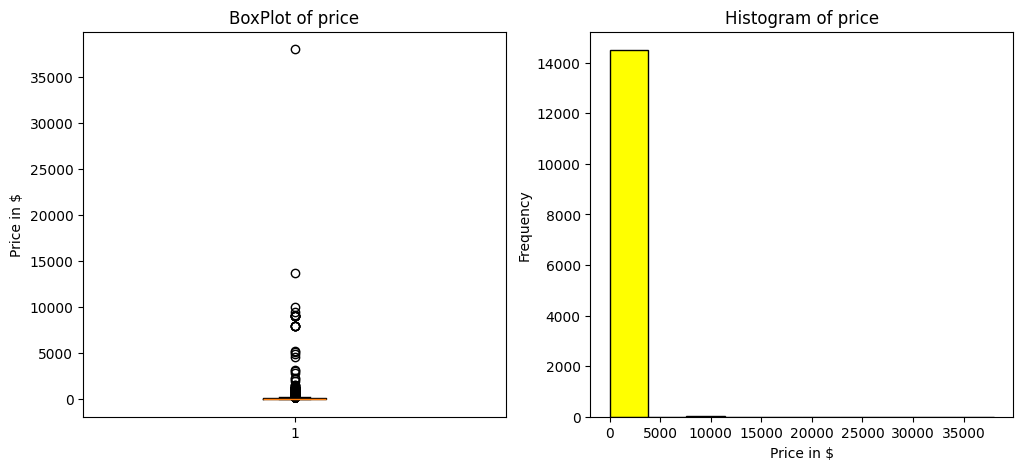

In [7]:
import matplotlib.pyplot as plt

working_class              = "price"
price_plot, (plot1, plot2) = plt.subplots(1, 2, figsize = (12,5))

plot1.boxplot(air_data_cl[working_class].dropna())
plot1.set_title(f"BoxPlot of {working_class}")
plot1.set_xlabel("")
plot1.set_ylabel("Price in $")

plot2.hist(air_data_cl[working_class].dropna(), color = "yellow", edgecolor = "black")
plot2.set_xlabel("Price in $")
plot2.set_ylabel("Frequency")
plot2.set_title(f"Histogram of {working_class}")

plt.show()

Create an outlier removal function. I will now use it to graphically see the difference in removing outliers.

In [8]:
def outlier_elimination(df, target_col):
    p25               = df[target_col].quantile(0.25)
    p75               = df[target_col].quantile(0.75)

    upper             = p75 + 1.5 * (p75 - p25)
    lower             = p25 - 1.5 * (p75 - p25)

    upper_killer      = df[target_col] <= upper
    lower_killer      = df[target_col] >= lower

    outlier_elim      = upper_killer * lower_killer

    new_df            = df[outlier_elim]

    new_row, new_cols = new_df.shape
    old_row, old_cils = df.shape
    print(" -- OutLier Elimination -- ")
    print(f"{((old_row - new_row) * 100) / old_row:.2f}% of rows has removed")

    return new_df

In [9]:
air_data_cl_for_visuals = outlier_elimination(air_data_cl, "price")

 -- OutLier Elimination -- 
14.57% of rows has removed


I repeat the process of visualizing the data in the price column after removing the outliers.

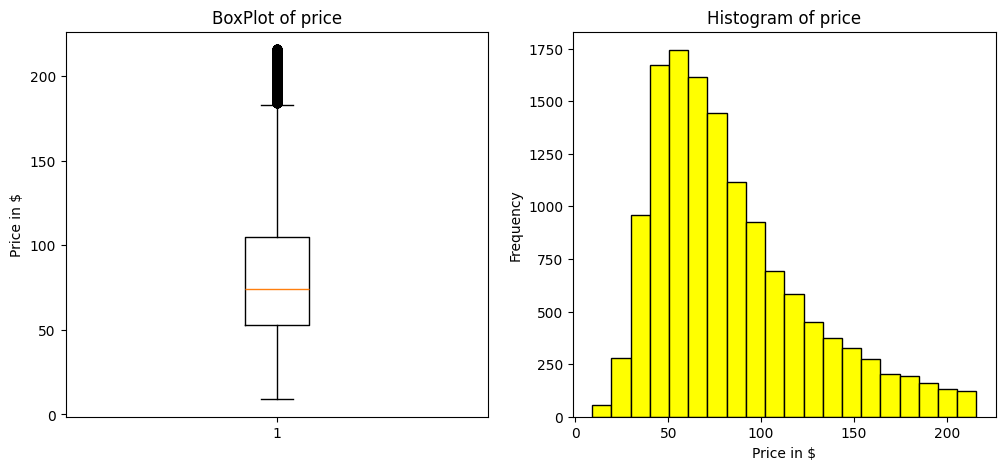

In [10]:
working_class = "price"
price_plot, (plot1, plot2) = plt.subplots(1, 2, figsize = (12,5))

plot1.boxplot(air_data_cl_for_visuals[working_class].dropna())
plot1.set_title(f"BoxPlot of {working_class}")
plot1.set_xlabel("")
plot1.set_ylabel("Price in $")

plot2.hist(air_data_cl_for_visuals[working_class].dropna(), color = "yellow", edgecolor = "black", bins = 20)
plot2.set_xlabel("Price in $")
plot2.set_ylabel("Frequency")
plot2.set_title(f"Histogram of {working_class}")

plt.show()

#### So far we have manually selected our data. We will see which ones will ultimately be the most useful, in order to run machine learning algorithms. Finally, we will compare our results with various metrics

In [11]:
air_data_big  = air_data.copy()

##### We remove columns that definitely don't give us any useful information from our data frame.

In [12]:
columns_to_drop = ["id",
                   "listing_url",
                   "scrape_id",
                   "picture_url",
                   "first_review",
                   "last_review",
                   "license",
                   "calendar_last_scraped",
                   "calendar_updated",
                   "bathrooms_text",
                   "host_about",
                   "neighborhood_overview",
                   "host_thumbnail_url",
                   "host_picture_url",
                   "host_since",
                   "host_about",
                   "host_url",
                   "host_id",
                   "neighborhood_overview",
                   "description",
                   "name",
                   "last_scraped",
                   "amenities",
                   "neighbourhood_group_cleansed",
                   "host_verifications",
                   ]

air_data_big   = air_data_big.drop(columns_to_drop, axis = "columns")
print(air_data_big.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584 entries, 0 to 15583
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   source                                        15584 non-null  object 
 1   host_name                                     15572 non-null  object 
 2   host_location                                 10406 non-null  object 
 3   host_response_time                            13812 non-null  object 
 4   host_response_rate                            13812 non-null  float64
 5   host_acceptance_rate                          14550 non-null  float64
 6   host_is_superhost                             14656 non-null  object 
 7   host_neighbourhood                            5748 non-null   object 
 8   host_listings_count                           15572 non-null  float64
 9   host_total_listings_count                     15572 non-null 

To maintain dataset quality, I assessed the completeness of categorical variables. The following features were dropped due to **high missingness**:

* **`neighbourhood` & `host_neighbourhood`:** These columns exhibit a significant percentage of missing values (>50%). Furthermore, the location data is fully captured in the complete `neighbourhood_cleansed` column, rendering these features **redundant**.

In [13]:
air_data_big = air_data_big.drop(["host_neighbourhood", "neighbourhood"], axis = "columns")

Before encoding, it is essential to examine the **cardinality** (number of unique values) of object-type features. This step helps identify:
* **Low-variance features:** Columns with only 1 unique value (candidates for removal).
* **High-cardinality features:** Columns with excessive categories that might require grouping or removal to prevent dimensionality explosion.

In [14]:
object_cols = air_data_big.select_dtypes(include = "object").columns

for column in object_cols:
    print(f"The {column} column has {air_data_big[column].nunique()} unique values")

The source column has 2 unique values
The host_name column has 2742 unique values
The host_location column has 337 unique values
The host_response_time column has 4 unique values
The host_is_superhost column has 2 unique values
The host_has_profile_pic column has 2 unique values
The host_identity_verified column has 2 unique values
The neighbourhood_cleansed column has 44 unique values
The property_type column has 47 unique values
The room_type column has 4 unique values
The has_availability column has 1 unique values
The instant_bookable column has 2 unique values


To ensure the model receives only meaningful inputs and to prevent the **Curse of Dimensionality**, I removed features that offer no statistical value or possess excessive cardinality:

* **`has_availability` (Zero Variance):** This feature contains a single unique value across the entire dataset. It provides **zero predictive power** and was excluded.
* **`host_name` (High Cardinality):** This categorical feature contains **2,742 unique values**. Including it would drastically increase the dataset's dimensions after encoding, leading to computational inefficiency and a high risk of **overfitting** without adding generalized predictive value.

In [15]:
air_data_big = air_data_big.drop(["has_availability", "host_name"], axis = "columns")

### Experimental Design: Model Benchmarking & Dataset Evaluation

In this phase, I establish a comparative framework to evaluate the **predictive power** of the two distinct feature sets defined earlier:
1.  **Manual Selection:** Based on domain intuition.
2.  **Automated Engineering:** Retaining maximum information.

I will benchmark a diverse suite of regression algorithms (Linear, Boosting, and Bagging) against both datasets to empirically determine which feature configuration yields the highest accuracy and generalization.

#### Automated Data Transformation Pipeline

To ensure consistency across all experiments and prevent data leakage, I constructed a dynamic `ColumnTransformer` function. This pipeline automatically detects data types and applies the appropriate transformations:

* **Categorical Features:** Imputation (Most Frequent) + Encoding (Ordinal/OneHot).
* **Numerical Features:** Imputation (Median) + Scaling (StandardScaler).

*This approach ensures the model can handle raw inputs seamlessly during inference.*

In [16]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute        import SimpleImputer
from sklearn.compose       import ColumnTransformer
from sklearn.pipeline      import Pipeline

# 
def one_hot_encoder_auto(df):

    cols_object         = df.select_dtypes(include = ["object"]).columns.tolist()
    cols_num            = df.select_dtypes(include = ["float", "int"]).columns.tolist()

    bin_cols            = [col for col in cols_object if df[col].nunique() == 2]
    non_bin_cols        = [col for col in cols_object if df[col].nunique() >  2]

    # Using pipeline for binary mapping
    binary_pipeline     = Pipeline([
        ("imputer", SimpleImputer(strategy = "most_frequent")),
        ("encoder", OrdinalEncoder())
    ])

    # Using pipeline for non binary mapping
    non_binary_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy = "constant", fill_value = "missing")),
        ("encoder", OneHotEncoder(handle_unknown = "ignore", drop = "first", sparse_output = False))
    ])

    # Using pipiline for non numerical mapping
    numeric_pipeline    = Pipeline([
        ("imputer", SimpleImputer(strategy = "median")),
        ("scaler", StandardScaler())
    ]) 

    # Transformation that joins these two mappings
    trans               = ColumnTransformer(
        transformers    = [
            ("bin", binary_pipeline, bin_cols),
            ("non_bin", non_binary_pipeline, non_bin_cols),
            ("num", numeric_pipeline, cols_num)
        ],
        remainder                 = "drop",
        verbose_feature_names_out = False
    )
    return trans
    

#### Multi-Model Benchmarking Engine

I implemented a modular evaluation engine to benchmark diverse regression algorithms simultaneously. This function standardizes the training loop, ensuring all models are evaluated on identical splits using consistent metrics (**MAE** & **$R^2$**).

**Candidate Algorithms:**
1.  **Linear Models:** Linear Regression, Ridge (Baseline).
2.  **Tree-Based:** Random Forest (for non-linear relationships).
3.  **Boosting:** XGBoost, LightGBM, CatBoost (State-of-the-art gradient boosting).

In [17]:
from   sklearn.model_selection import train_test_split
from   sklearn.linear_model    import LinearRegression, Ridge, Lasso
from   sklearn.ensemble        import RandomForestRegressor
from   xgboost                 import XGBRegressor
from   sklearn.metrics         import mean_absolute_error, r2_score
from   catboost                import CatBoostRegressor
from   lightgbm                import LGBMRegressor
import warnings 

warnings.filterwarnings("ignore")  # This removes the warnings that appear at the end
                                   # These have to do with categories that are present in the test data
                                   # and happen to not be present in the training data.

def models(data_frames, target_col):

    # List of models we will run
    models = {
            "Linear Regression" : LinearRegression(),
            "Ridge            " : Ridge(),
            "LightGBM         " : LGBMRegressor(random_state = 42, verbose = -1),
            "CatBoost         " : CatBoostRegressor(random_state = 42, verbose = 0),
            "Random Forest    " : RandomForestRegressor(random_state = 42),
            "XGBoost          " : XGBRegressor(random_state = 42)
        }
    all_results = [] # This is where our results will be stored.

    # By using a for loop we can run the above models for each data frame within the function
    for name, df in data_frames.items():

        df_raw = df.copy()   
        df_raw = df_raw.dropna(subset = [target_col]) # Removing NaN from the target column

        X      = df_raw.drop(columns  = [target_col]) # Dependent variables
        y      = df_raw[target_col]                   # Independent variable, 

        # We divide the data into training data and testing data.
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
        
        # Configure the transformer which gets the information from X_train
        preprocessor = one_hot_encoder_auto(X_train)

        print(f"== == == Running Experiments for the {name} == == ==")
 
        for name, model in models.items():
            
            # Create a pipeline that bundles the preprocessor and the model
            clf = Pipeline([
                ("preprocessor", preprocessor),
                ("model", model)
            ])

            # Model Training Process
            clf.fit(X_train, y_train)
            
            # Prediction Process
            predicts = clf.predict(X_test)

            # Evaluation of our models
            mae      = mean_absolute_error(y_test, predicts)
            r2       = r2_score(y_test, predicts)

            # Append the results of the current model to the results list
            all_results.append({
                "Model   " : name,
                "Mae     " : round(mae, 2),
                "R2 Score" : round(r2 , 2)    
            })
            print(f"-> {name}: MAE: {mae:.2f} $ and R2: {r2 * 100:.2f} %")
        print("")
    return pd.DataFrame(all_results)

#### Experiment 0: Establishing a Baseline (Raw Data)

Before applying statistical transformations, I establish a **performance baseline** by training models on the data in its raw form:
* **Target Variable:** `price` (Original Scale, Non-Log).
* **Outliers:** Included (No IQR filtering).

*Goal: To quantify the baseline error and measure the impact of subsequent optimization steps (Log-transformation & Outlier Removal).*

In [18]:
data_frames0 = {
    "Manual Selected Data      " : air_data_cl,
    "Automated Engineering Data" : air_data_big,
}

print("** ** ** Performance testing of ML algorithms ** ** **")
print("")
results1 = models(data_frames0, "price")

** ** ** Performance testing of ML algorithms ** ** **

== == == Running Experiments for the Manual Selected Data       == == ==
-> Linear Regression: MAE: 70.90 $ and R2: 3.86 %
-> Ridge            : MAE: 70.83 $ and R2: 3.86 %
-> LightGBM         : MAE: 79.61 $ and R2: -6.74 %
-> CatBoost         : MAE: 64.47 $ and R2: -5.49 %
-> Random Forest    : MAE: 57.53 $ and R2: -3.05 %
-> XGBoost          : MAE: 70.06 $ and R2: -26.14 %

== == == Running Experiments for the Automated Engineering Data == == ==
-> Linear Regression: MAE: 100.13 $ and R2: -6.89 %
-> Ridge            : MAE: 98.21 $ and R2: -4.46 %
-> LightGBM         : MAE: 47.15 $ and R2: 36.17 %
-> CatBoost         : MAE: 32.95 $ and R2: 43.98 %
-> Random Forest    : MAE: 32.77 $ and R2: 43.24 %
-> XGBoost          : MAE: 30.16 $ and R2: 45.73 %



#### Experiment 1: Stabilizing Variance (Log-Transformation)

In this experiment, I address the **right-skewed distribution** of the target variable (`price`) observed in the EDA phase.

**Methodology:**
* **Transformation:** Applied `np.log1p` (Logarithm + 1) to the `price` column.
* **Objective:** To normalize the distribution and reduce the impact of heteroscedasticity, making the relationship between features and price more linear for the algorithms to capture.

*Hypothesis: Tree-based models (like XGBoost) and Linear Regression should show significant performance gains compared to the Baseline (Experiment 0).*

In [19]:
# logarithm of the price column
air_data_cl_log            = air_data_cl.copy()
air_data_cl_log["price"]   = np.log1p(air_data_cl_log["price"])

air_data_big_log           = air_data_big.copy()
air_data_big_log["price"]  = np.log1p(air_data_big_log["price"])

In [20]:
data_frames1 = {
    "Manual Selected Data      " : air_data_cl_log,
    "Automated Engineering Data" : air_data_big_log,
}

print("** ** ** Performance testing of algorithms after logarithmizing the price column ** ** **")
print("")
# Execute algorithm test function
results1 = models(data_frames1, "price")

** ** ** Performance testing of algorithms after logarithmizing the price column ** ** **

== == == Running Experiments for the Manual Selected Data       == == ==
-> Linear Regression: MAE: 0.37 $ and R2: 39.72 %
-> Ridge            : MAE: 0.37 $ and R2: 39.73 %
-> LightGBM         : MAE: 0.30 $ and R2: 58.04 %
-> CatBoost         : MAE: 0.29 $ and R2: 60.28 %
-> Random Forest    : MAE: 0.29 $ and R2: 58.05 %
-> XGBoost          : MAE: 0.30 $ and R2: 58.80 %

== == == Running Experiments for the Automated Engineering Data == == ==
-> Linear Regression: MAE: 0.30 $ and R2: 58.07 %
-> Ridge            : MAE: 0.30 $ and R2: 58.91 %
-> LightGBM         : MAE: 0.15 $ and R2: 84.47 %
-> CatBoost         : MAE: 0.13 $ and R2: 86.84 %
-> Random Forest    : MAE: 0.17 $ and R2: 80.57 %
-> XGBoost          : MAE: 0.15 $ and R2: 85.40 %



#### Experiment 2: Noise Reduction (Outlier Removal)

Extreme price values (e.g., super-luxury villas or potential data entry errors) can disproportionately influence regression models, pulling the predicted trend away from the majority of the data.

**Methodology:**
* **Technique:** Applied the **Interquartile Range (IQR)** method to filter out statistical anomalies.
* **Action:** Removed listings with prices falling outside the typical range defined by the 25th and 75th percentiles.

*Hypothesis: Removing outliers should significantly reduce the Mean Absolute Error (MAE) for "typical" apartments, creating a specialist model for the core market, even if it sacrifices accuracy on high-end listings.*

In [21]:
# Removing outliers using the previously created function (outlier_elimination)
air_data_cl_no_outliers  = outlier_elimination(air_data_cl,  "price")
air_data_big_no_outliers = outlier_elimination(air_data_big, "price")

 -- OutLier Elimination -- 
14.57% of rows has removed
 -- OutLier Elimination -- 
14.57% of rows has removed


In [22]:
# Creating the data frame to apply to our model function
data_frames2 = {
    "Manual Selected Data no OutLiers      " : air_data_cl_no_outliers,
    "Automated Engineering Data no OutLiers" : air_data_big_no_outliers
}
print("** ** ** Performance testing of algorithms after removing outliers ** ** **")
print("")

# Execute algorithm test function
results2 = models(data_frames2, "price")

** ** ** Performance testing of algorithms after removing outliers ** ** **

== == == Running Experiments for the Manual Selected Data no OutLiers       == == ==
-> Linear Regression: MAE: 25.54 $ and R2: 32.63 %
-> Ridge            : MAE: 25.54 $ and R2: 32.63 %
-> LightGBM         : MAE: 20.29 $ and R2: 52.26 %
-> CatBoost         : MAE: 20.03 $ and R2: 53.17 %
-> Random Forest    : MAE: 20.64 $ and R2: 49.91 %
-> XGBoost          : MAE: 20.32 $ and R2: 51.46 %

== == == Running Experiments for the Automated Engineering Data no OutLiers == == ==
-> Linear Regression: MAE: 18.84 $ and R2: 60.93 %
-> Ridge            : MAE: 18.75 $ and R2: 61.18 %
-> LightGBM         : MAE: 9.24 $ and R2: 85.58 %
-> CatBoost         : MAE: 8.50 $ and R2: 86.93 %
-> Random Forest    : MAE: 11.84 $ and R2: 79.07 %
-> XGBoost          : MAE: 10.08 $ and R2: 84.78 %



#### Experiment 3: The Hybrid Approach (Log-Transformation + Outlier Removal)

Building on the insights from Experiments 1 and 2, I combined both techniques to engineer an optimal training set. Additionally, based on the poor performance observed in all Experiments, I decided to **discard the "Manually Selected" dataset**, as it evidently lacked sufficient predictive signal (underfitting).

**Methodology:**
1.  **Selection:** Proceeding exclusively with the "Automated Engineering" dataset.
2.  **Filtering:** Applied IQR outlier removal to eliminate noise.
3.  **Transformation:** Applied `np.log1p` to the filtered target variable.

*Hypothesis: By simultaneously stabilizing variance (Log) and removing noise (Outliers), this hybrid approach is expected to yield the **highest predictive accuracy ($R^2$)** across all algorithms.*

In [23]:
air_data_big_no_outliers_log          = air_data_big_no_outliers.copy()
air_data_big_no_outliers_log["price"] = np.log1p(air_data_big_no_outliers_log["price"])

data_frames3 = {
    "Automated Engineering Data No OutLiers Log Price" : air_data_big_no_outliers_log
}

results3 = models(data_frames3, "price")

== == == Running Experiments for the Automated Engineering Data No OutLiers Log Price == == ==
-> Linear Regression: MAE: 0.21 $ and R2: 65.75 %
-> Ridge            : MAE: 0.21 $ and R2: 66.04 %
-> LightGBM         : MAE: 0.11 $ and R2: 88.00 %
-> CatBoost         : MAE: 0.09 $ and R2: 89.31 %
-> Random Forest    : MAE: 0.15 $ and R2: 79.43 %
-> XGBoost          : MAE: 0.12 $ and R2: 86.50 %



### Observations & Conclusions

Looking at the results across all three experiments, I reached some key conclusions about the nature of the data and the behavior of the models.

**1. Data Selection: Manual vs. Automated**
It became clear quickly that my initial intuition to manually select features (`Manual Selection`) didn't pay off. The models trained on the `Automated Engineering` dataset performed significantly better. This suggests that by manually picking features, I likely excluded non-obvious but valuable information (**underfitting**).

**2. The Problem with Price (Distribution & Outliers)**
The raw price data was heavily **right-skewed** and contained extreme values (outliers), which confused the models in Experiment 0.
* **Linear Models:** They struggled the most because they assume a normal distribution and homoscedasticity (constant variance), which our raw data didn't have.
* **Tree-Based Models (CatBoost/XGBoost):** Even though they handle non-linear data better, they still improved massively when I removed the noise (outliers) and applied the log-transformation.

**3. The "Sweet Spot" (Experiment 3)**
The combination of **removing outliers** (IQR method) and **log-transforming** the target variable proved to be the winning strategy. It helped "normalize" the data distribution, allowing **CatBoost** to achieve the highest accuracy ($R^2 \approx 89.3\%$ and $MAE \approx 0.09$ in log-scale).

### AutoML Architecture: Automated Model Selection & Tuning

To streamline the modeling process and ensure optimal performance, I designed a custom **AutoML pipeline**. Instead of manually tuning models, I implemented a modular system that automates:
1.  **Candidate Screening:** Testing multiple algorithms to find the top performers.
2.  **Hyperparameter Tuning:** Optimizing the best models using Randomized Search.
3.  **Ensembling:** Combining top models into a Voting Regressor for maximum stability.

#### Module 1: Candidate Screening (`best_model_finder`)

**Objective:** To empirically identify which algorithms suit the dataset best.

This function acts as a **leaderboard generator**. It takes a dataframe and target column as inputs, trains a diverse set of default models (Linear, Tree-based, Boosting), and returns the top $N$ performers based on $R^2$ score. This filters out weak algorithms early in the process.

In [24]:
from   sklearn.model_selection import train_test_split
from   sklearn.linear_model    import LinearRegression, Ridge
from   sklearn.ensemble        import RandomForestRegressor, ExtraTreesRegressor
from   xgboost                 import XGBRegressor
from   sklearn.metrics         import r2_score
from   catboost                import CatBoostRegressor
from   lightgbm                import LGBMRegressor
import warnings 

warnings.filterwarnings("ignore")

def best_model_finder(df, target_col, num_of_models):

    # Candidate models
    models = [
        LinearRegression(),
        Ridge(),
        LGBMRegressor(random_state = 42, verbose = -1, n_jobs = -1),
        XGBRegressor(random_state = 42),
        CatBoostRegressor(random_state = 42, verbose = 0),
        RandomForestRegressor(random_state = 42, n_jobs= -1),
        ExtraTreesRegressor(random_state = 42, n_jobs = -1)
    ]

    # Preparing our data frame
    df = df.dropna(subset = [target_col])
    X  = df.drop(columns = target_col)
    y  = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    # Preprocessor
    preprocessor = one_hot_encoder_auto(X_train)
    score_board = []    

    for model in models:
        clf = Pipeline([
            ("preprocessor", preprocessor),
            ("model", model)
        ])

        # Training and Evaluation
        clf.fit(X_train, y_train)
        predict = clf.predict(X_test)
        score   = r2_score(y_test, predict)

        model_name  = model.__class__.__name__
        model_class = model.__class__
        print(f"  -> {model_name}: {score * 100 :.2f} %")

        score_board.append({
            "Model Name"  : model_name,
            "Model Class" : model_class,
            "R2 Score"    : score
        })
    
    df_score_board = pd.DataFrame(score_board)
    df_score_board = df_score_board.sort_values(by = "R2 Score", ascending = False).reset_index(drop = True)
    
    best_2_models_name  = df_score_board["Model Name"].iloc[:num_of_models]
    best_2_models_class = df_score_board["Model Class"].iloc[:num_of_models]
    best_2_models_score = df_score_board["R2 Score"].iloc[:num_of_models]

    print(f"The best model is {best_2_models_name[0]} with Score: {best_2_models_score[0] * 100 :.4f} %")
    return best_2_models_class

#### Module 2: Search Space Definition (`get_param`)

**Objective:** To define the hyperparameter search space for each algorithm.

Instead of hardcoding parameters, this function returns a dynamic dictionary of distributions (e.g., `loguniform` for learning rates, `randint` for depth). This allows the tuning engine to explore a wide range of possibilities effectively.

In [25]:
from scipy.stats             import randint, uniform, loguniform

# That's a test code witch aims to automate the parameter list for each ml algorithm
def get_param(model):
    model_name = model

    if   model_name == LinearRegression:
        return {
            "model__fit_intercept"    : [True, False],
            "model__positive"         : [True, False]
        }
    elif model_name == Ridge:
        return {
            "model__alpha"            : loguniform(1e-3, 1e3),
            "model__solver"           : ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]
        }
    elif model_name == LGBMRegressor:
        return {
            "model__n_estimators"     : randint(500, 3000),
            "model__learning_rate"    : loguniform(0.005, 0.1),
            "model__num_leaves"       : randint(20, 256),
            "model__max_depth"        : randint(5, 15),
            "model__min_child_samples": randint(20, 100),
            "model__subsample"        : uniform(0.6, 0.4),
            "model__colsample_bytree" : uniform(0.6, 0.4),
            "model__reg_alpha"        : uniform(0, 5),
            "model__reg_lambda"       : uniform(0, 10),
            "model__verbose"          : [-1] # This must be equal to zero otherwise the training calendar will be displayed which is usually very large.
        }
    elif model_name == XGBRegressor:
        return {
            "model__n_estimators"     : randint(500, 3000),
            "model__learning_rate"    : loguniform(0.005, 0.1),
            "model__max_depth"        : randint(3, 10),
            "model__min_child_weight" : randint(1, 20),
            "model__gamma"            : uniform(0, 0.5),
            "model__subsample"        : uniform(0.6, 0.4),
            "model__colsample_bytree" : uniform(0.6, 0.4),
            "model__reg_alpha"        : uniform(0, 5),
            "model__reg_lambda"       : uniform(1, 10),
            "model__verbose"          : [0] # same as above
        }
    elif model_name == CatBoostRegressor:
        return {
            "model__iterations"       : randint(500, 2000),
            "model__learning_rate"    : loguniform(0.01, 0.1),
            "model__depth"            : randint(4, 10),
            "model__l2_leaf_reg"      : randint(1, 15),
            "model__border_count"     : [128, 254],
            "model__subsample"        : uniform(0.6, 0.4),
            "model__verbose"          : [0] # same as above
        }
    elif model_name == RandomForestRegressor:
        return {
            "model__n_estimators"     : randint(200, 1000),
            "model__max_depth"        : [None] + list(range(15, 60)),
            "model__min_samples_split": randint(2, 10),
            "model__min_samples_leaf" : randint(1, 5),
            "model__max_features"     : ['sqrt', 'log2', 1.0],
            "model__bootstrap"        : [True, False]
        }
    elif model_name == ExtraTreesRegressor:
        return {
            "model__n_estimators"     : randint(200, 1000),
            "model__max_depth"        : [None] + list(range(15, 60)),
            "model__min_samples_split": randint(2, 10),
            "model__min_samples_leaf" : randint(1, 5),
            "model__max_features"     : ["sqrt", "log2", 1.0],
            "model__bootstrap"        : [True, False]
        }
    return {}

#### Module 3: Hyperparameter Optimization (`model_tuner`)

**Objective:** To squeeze maximum performance out of the selected top models.

This function takes the "winners" from Module 1 and performs a **RandomizedSearchCV**. It iteratively tests different parameter combinations (defined in Module 2) using Cross-Validation, ensuring the final models are tuned specifically for this dataset's characteristics.

In [26]:
from sklearn.model_selection import RandomizedSearchCV

# That's a test code witch aims to seek the best parameters for our model
def model_tuner(df_winner, target_col, model_winner):
    df = df_winner.dropna(subset = [target_col])   # removing NaN based on the target column

    X  = df.drop(columns = [target_col])
    y  = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    preprocessor = one_hot_encoder_auto(X_train)   # Set up automatic encoding and missing value imputation based on training data

    best_estimators = []

    for model in model_winner:

        model_for_tuning = model(random_state = 42)
        param_dist       = get_param(model)         # Finding the right parameters for the best model above

       # Create a pipeline with the preprocessor and the selected model
        clf          = Pipeline([
             ("preprocessor", preprocessor),
             ("model", model_for_tuning)
        ])

        print(f"-- -- Hyperparameter Tuning for {model.__name__} -- --")

        # Initialize the hyperparameter tuning process using Randomized Search 
        random_search           = RandomizedSearchCV(
            estimator           = clf,        # Pipeline that contains the best model and the preprocessor we build
            param_distributions = param_dist, # Parameters to be optimized
            n_iter              = 100,         # Test 50 random combinations
            scoring             = "r2",       # Maximizing the r2 metric
            cv                  = 4,          # CV with 4 folds
            verbose             = 0,
            random_state        = 42,
            n_jobs              = -1          # using all processor cores
        )
        random_search.fit(X_train, y_train)
        estimator = random_search.best_estimator_
        predicts  = estimator.predict(X_test)
        r2  = r2_score(y_test, predicts)

        print(f"-- {model.__name__} best score is: {r2 * 100 :.4f} %")
        
        best_estimators.append((model.__name__, estimator))

    print("-- -- Hyperparameter Tuning Finished -- --")
    return best_estimators

#### Module 4: Ensemble Construction (`model_ensembler`)

**Objective:** To improve generalization and reduce variance.

This function aggregates the optimized models into a **VotingRegressor**. By averaging the predictions of distinct strong learners (e.g., XGBoost + CatBoost), the final ensemble becomes more robust to noise and less prone to overfitting than any single model alone.

In [27]:
from sklearn.ensemble import VotingRegressor

def model_ensembler(df, target_col, model):

    print("-- -- Starting Ensemble Learning -- --") 
    ensemble_model = VotingRegressor(
        estimators = model,
        n_jobs = -1
    )

    df = df.dropna(subset = target_col)
    X  = df.drop(columns = [target_col])
    y  = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    final_model = ensemble_model.fit(X_train, y_train)

    final_pred  = ensemble_model.predict(X_test)
    final_score = r2_score(y_test, final_pred)

    print(f"Ensembe Model Score: {final_score * 100 :.4f} %")

    return final_model

#### Master Pipeline: End-to-End Orchestration (`auto_ml_pipeline`)

**Objective:** To abstract complexity and execute the full workflow with a single call.

This wrapper function orchestrates the entire lifecycle:
1.  Calls `best_model_finder` to select top candidates.
2.  Passes them to `model_tuner` for optimization.
3.  Feeds the tuned versions into `model_ensembler` to build the final production-ready model.

In [28]:
def auto_ml_pipeline(df, target_col, num_of_models):
    print(" === === === Auto Machine Learning Pipeline === === ===")
    model_winner   = best_model_finder(df, target_col, num_of_models)
    print("")
    best_estimator = model_tuner(df, target_col, model_winner)
    final_model    = model_ensembler(df, target_col, best_estimator)
    return final_model

In [29]:
pice_pred_model = auto_ml_pipeline(df = air_data_big_log, target_col = "price", num_of_models = 3)

 === === === Auto Machine Learning Pipeline === === ===
  -> LinearRegression: 58.07 %
  -> Ridge: 58.91 %
  -> LGBMRegressor: 84.47 %
  -> XGBRegressor: 85.40 %
  -> CatBoostRegressor: 86.84 %
  -> RandomForestRegressor: 80.57 %
  -> ExtraTreesRegressor: 80.75 %
The best model is CatBoostRegressor with Score: 86.8396 %

-- -- Hyperparameter Tuning for CatBoostRegressor -- --
-- CatBoostRegressor best score is: 88.3346 %
-- -- Hyperparameter Tuning for XGBRegressor -- --
-- XGBRegressor best score is: 87.1347 %
-- -- Hyperparameter Tuning for LGBMRegressor -- --
-- LGBMRegressor best score is: 87.8949 %
-- -- Hyperparameter Tuning Finished -- --
-- -- Starting Ensemble Learning -- --
Ensembe Model Score: 88.3976 %


In [30]:
price_pred_model_average = auto_ml_pipeline(df = air_data_big_no_outliers_log, target_col = "price", num_of_models = 3)

 === === === Auto Machine Learning Pipeline === === ===
  -> LinearRegression: 65.75 %
  -> Ridge: 66.04 %
  -> LGBMRegressor: 88.00 %
  -> XGBRegressor: 86.50 %
  -> CatBoostRegressor: 89.31 %
  -> RandomForestRegressor: 79.43 %
  -> ExtraTreesRegressor: 82.16 %
The best model is CatBoostRegressor with Score: 89.3065 %

-- -- Hyperparameter Tuning for CatBoostRegressor -- --
-- CatBoostRegressor best score is: 90.5852 %
-- -- Hyperparameter Tuning for LGBMRegressor -- --
-- LGBMRegressor best score is: 90.2139 %
-- -- Hyperparameter Tuning for XGBRegressor -- --
-- XGBRegressor best score is: 88.0884 %
-- -- Hyperparameter Tuning Finished -- --
-- -- Starting Ensemble Learning -- --
Ensembe Model Score: 90.4658 %


### 🏁 Conclusion & Model Selection

Completing this analysis, I have successfully build two distinct **Ensemble models (Voting Regressors)** to predict Airbnb daily rental prices in Athens. 

In both cases, I applied a **log-transformation** to the target variable. This step was crucial to address the skewed distribution of prices and manage heteroscedasticity, ensuring the models perform well across different price ranges.

* **`price_pred_model`** Trained on the complete dataset, this model learns from the entire market spectrum, including high-end and luxury listings. It explains approximately **88.5%** of the price variance ($R^2 = 0.885$).

* **`price_pred_model_average`** This model focuses on the core market. I trained it on a filtered dataset where extreme outliers were removed via the IQR method. As a result, it achieves higher precision for "typical" apartments, explaining **90.45%** of the variance ($R^2 = 0.904$).

**Deployment Strategy:** The final application will leverage both models dynamically: the `price_pred_model` will handle luxury/unique queries, while the `price_pred_model_average` will ensure maximum accuracy for standard listings.